In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD

In [44]:
data = pd.read_csv('/content/cl_data_books.csv')

In [46]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Text(0.5, 1.0, 'Распределение жанров')

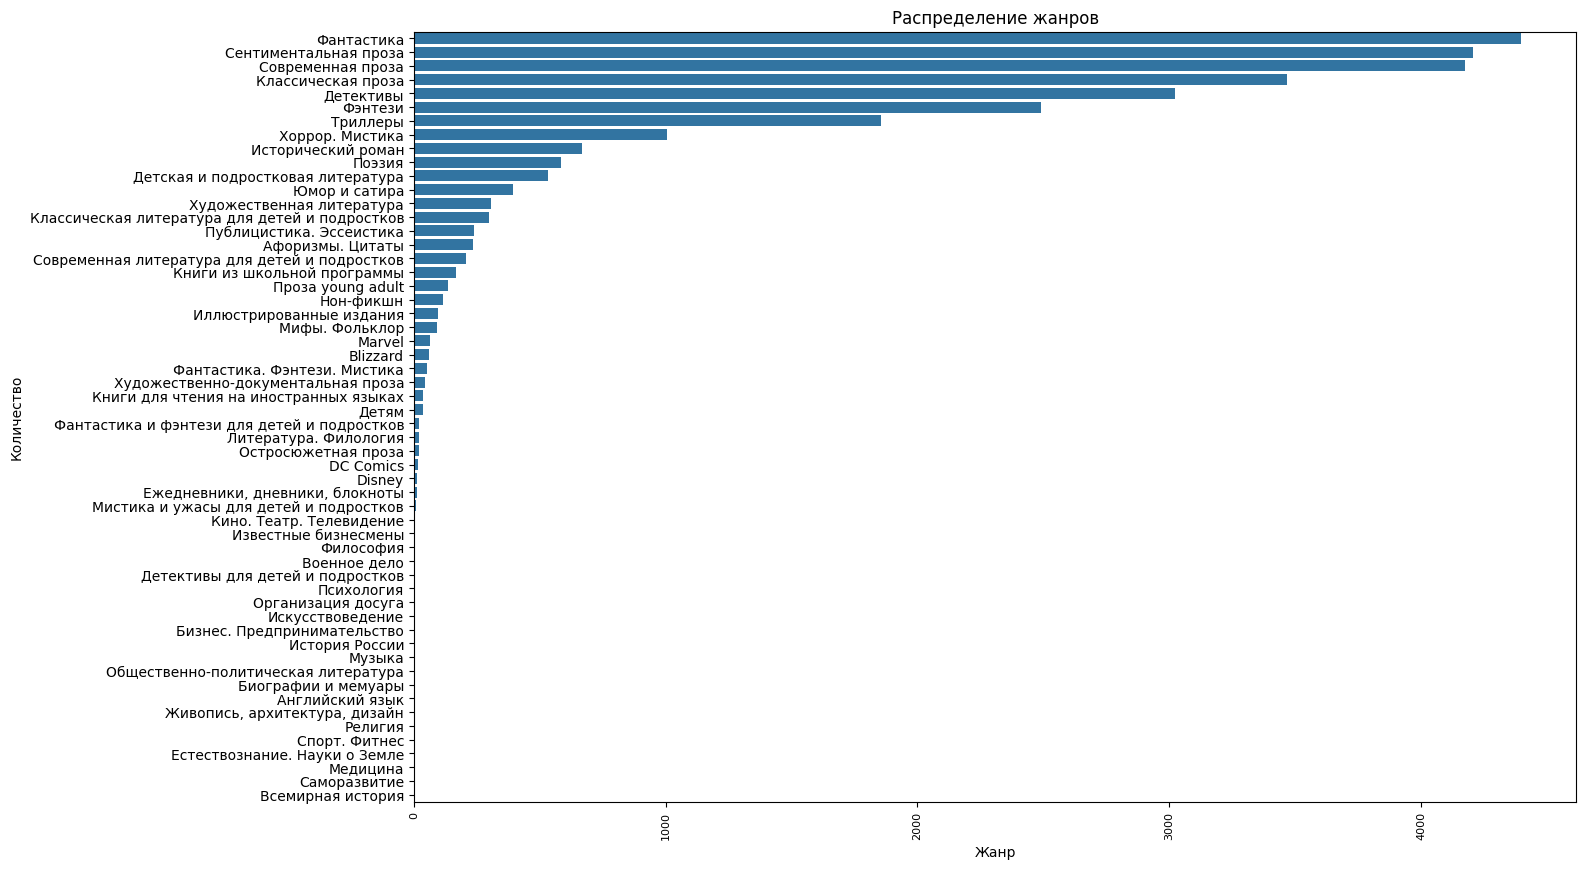

In [47]:
genre_counts = data['genre'].value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.title('Распределение жанров')

In [163]:
features = (data['Author']) + ' ' + data['genre'] + ' ' + data['series'] + ' ' + data['Annotation']

In [164]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(features)

In [165]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bag_of_words)
tfidf

<29141x151889 sparse matrix of type '<class 'numpy.float64'>'
	with 1882716 stored elements in Compressed Sparse Row format>

In [166]:
lsa = TruncatedSVD(n_components=100, algorithm='arpack')
tfidf = lsa.fit_transform(tfidf)

In [146]:
books_users, author_users = input('Введите свою книгу:'), input('Введите автора:')

Введите свою книгу:Двадцать тысяч лье под водой
Введите автора:Верн Жюль


In [169]:
books_user_index = data[(data['Title'] == books_users) & (data['Author'] == author_users)].index[0]

In [170]:
tfidf[books_user_index].reshape(1, -1)

array([[ 0.09462527,  0.05453193, -0.00891327, -0.0077374 ,  0.11822562,
        -0.00801763, -0.03704795, -0.03908922, -0.06619044, -0.0265901 ,
        -0.00902391, -0.01501682, -0.02607779, -0.03630858, -0.04952695,
        -0.01215446, -0.01329945, -0.02524759,  0.01429671, -0.03118997,
        -0.02164557, -0.0395357 ,  0.0088705 ,  0.01236744, -0.00125784,
        -0.07007447,  0.0039383 , -0.07151337,  0.03807983, -0.05021716,
        -0.03613462, -0.01677885,  0.08822462, -0.02245081,  0.0568432 ,
        -0.03315272,  0.07440262, -0.1375414 ,  0.00961999, -0.00827286,
        -0.01059291,  0.00466689,  0.04435036, -0.12988238,  0.0557616 ,
         0.05989598, -0.0577381 ,  0.01493489,  0.0212456 ,  0.01528311,
        -0.02055858, -0.07963411,  0.07203355,  0.02247716,  0.0295222 ,
         0.01171017, -0.0335489 ,  0.01183225, -0.0933516 ,  0.00792322,
         0.04969359, -0.06557379, -0.00361603,  0.15283789,  0.02375228,
         0.03289523,  0.02556284,  0.09753011,  0.0

In [171]:
tfidf

array([[ 0.1214333 , -0.01512871,  0.02187385, ..., -0.00524107,
        -0.00922816, -0.03347222],
       [ 0.09428913, -0.01030721, -0.00380485, ..., -0.00268647,
        -0.00201687,  0.0118697 ],
       [ 0.15028681, -0.04808783, -0.02562957, ...,  0.00920193,
         0.00784279,  0.01906408],
       ...,
       [ 0.1235371 ,  0.10269424,  0.58538456, ...,  0.01627583,
         0.07492076, -0.0821213 ],
       [ 0.13105951,  0.08515033,  0.45712848, ..., -0.01234514,
        -0.02113629,  0.00500259],
       [ 0.06255837,  0.06555992,  0.00280789, ...,  0.0085183 ,
         0.00453402,  0.01289253]])

In [172]:
similiar_books = cosine_similarity(tfidf[books_user_index].reshape(1, -1), tfidf)

In [175]:
list_similiar = list(enumerate(similiar_books[0]))
sorted_similiar = sorted(list_similiar, key= lambda x: x[1], reverse=True)

In [195]:
top5 = sorted_similiar[:5]
other_books = [book for book in list_similiar if book[1] > 0.5 and book[1] < 0.8][:15]

In [196]:
final_rec = top5 + other_books

In [197]:
for i, books in final_rec:
    print(f'Стоит почитать: {data.iloc[i]} score{books}')


Стоит почитать: Title                                         Таинственный остров
Author                                                  Верн Жюль
Annotation      Французский классик приключенческой литературы...
num of pages                                                  672
genre              Классическая литература для детей и подростков
series                                      Эксклюзивная классика
book cover      https://cdn.ast.ru/v2/ASE000000000723521/COVER...
Name: 806, dtype: object score1.0
Стоит почитать: Title                                Двадцать тысяч лье под водой
Author                                                  Верн Жюль
Annotation      Французский классик приключенческой литературы...
num of pages                                                  512
genre              Классическая литература для детей и подростков
series                                      Эксклюзивная классика
book cover      https://cdn.ast.ru/v2/ASE000000000840362/COVER...
Name: 931,